In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR Data
X = np.array([[0,0], [0,1], [1,0], [1,1]])   
y = np.array([[0], [1], [1], [0]])           

# Activation function (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases randomly
np.random.seed(1)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Weights and bias for input to hidden layer
w1 = np.random.uniform(size=(input_neurons, hidden_neurons))
b1 = np.random.uniform(size=(1, hidden_neurons))

# Weights and bias for hidden to output layer
w2 = np.random.uniform(size=(hidden_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))

# Training loop
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass 
    hidden_input = np.dot(X, w1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, w2) + b2
    final_output = sigmoid(final_input)

    # Backward pass 
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(w2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights 
    w2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    w1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    #Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error)):.4f}")

print("\nFinal predictions:")
print(final_output.round())


Epoch 0, Error: 0.4997
Epoch 1000, Error: 0.4997
Epoch 2000, Error: 0.4982
Epoch 3000, Error: 0.4830
Epoch 4000, Error: 0.4163
Epoch 5000, Error: 0.3254
Epoch 6000, Error: 0.1678
Epoch 7000, Error: 0.1096
Epoch 8000, Error: 0.0846
Epoch 9000, Error: 0.0705

Final predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


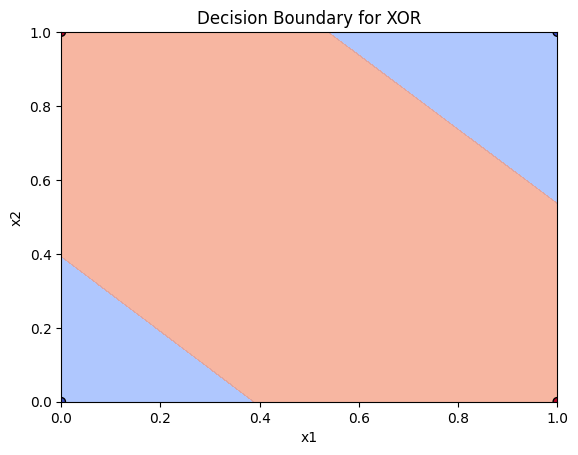

In [2]:
def predict(x):
    hidden = sigmoid(np.dot(x, w1) + b1)
    output = sigmoid(np.dot(hidden, w2) + b2)
    return output

xx, yy = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=[0,0.5,1], cmap="coolwarm", alpha=0.7)
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap="coolwarm", edgecolors='k')
plt.title("Decision Boundary for XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
